<a href="https://colab.research.google.com/github/B34R-e/Pytorch-Tutorial/blob/main/Pytorch_Tutorial_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Gradient Calculation with Autograd**

#### Gradient Calculation

In [ ]:
import torch

x = torch.randn(3, requires_grad = True) # torch.randn gives randoms with negative values included while torch.rand gives randoms with no negative values included.
print(x)

tensor([-1.0696,  0.5620, -0.0287], requires_grad=True)


In [ ]:
y = x + 2
print(y)

tensor([0.9304, 2.5620, 1.9713], grad_fn=<AddBackward0>)


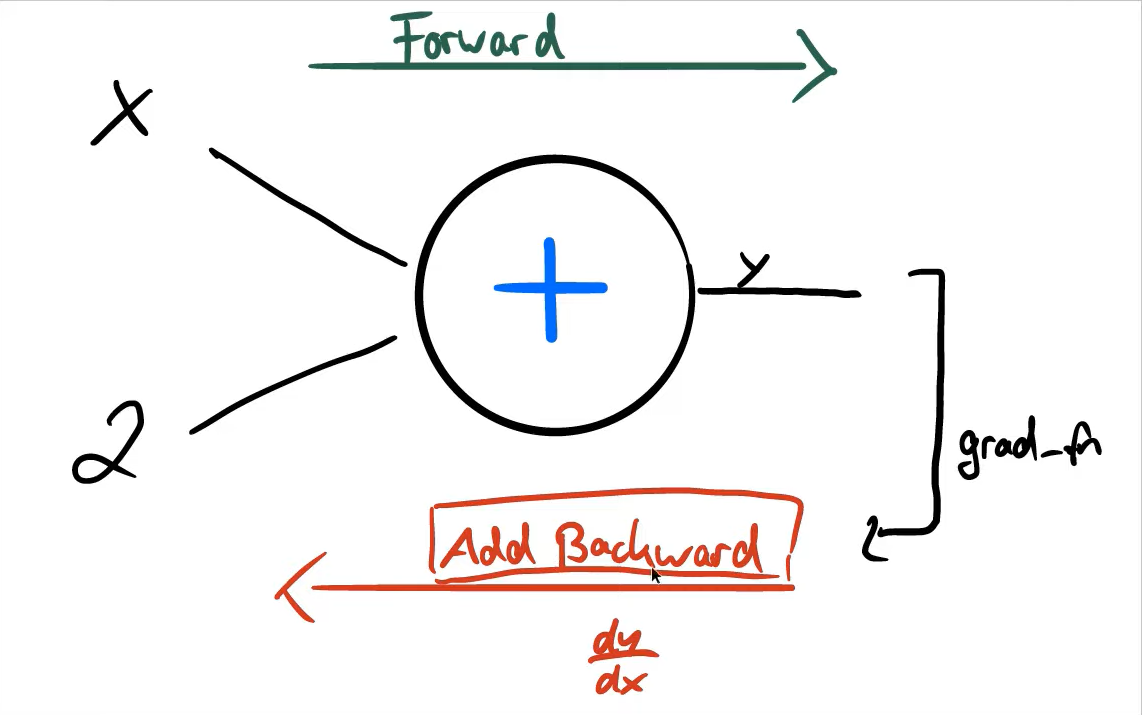

In [ ]:
z = y*y*2
print(z)

tensor([ 1.7314, 13.1274,  7.7723], grad_fn=<MulBackward0>)


In [ ]:
# z = z.mean()
# print(z)

tensor(7.5437, grad_fn=<MeanBackward0>)


In [ ]:
v = torch.tensor([0.1, 1.0, 0.001], dtype = torch.float32)
z.backward(v) # dz/dx
print(x.grad)

tensor([ 1.6127, 13.6638,  2.6363])


#### Preventing Gradient History

In [ ]:
x = torch.randn(3, requires_grad = True)
print(x)

tensor([ 1.4658, -1.2697, -0.3630], requires_grad=True)


In [ ]:
# 3 options
# First: x.requires_grad_(False)
# Second: x.detach()
# Third: with torch.no_grad():

In [ ]:
# x.requires_grad_(False)
x.requires_grad_(False)
print(x)

tensor([-2.0121,  0.7853, -0.4824])


In [ ]:
# x.detach()
x.detach()
print(x)

tensor([-2.0121,  0.7853, -0.4824])


In [ ]:
# with torch.no_grad():
with torch.no_grad():
  y = x + 2
  print(y)

tensor([3.4658, 0.7303, 1.6370])


#### Training example

In [ ]:
weights = torch.ones(4, requires_grad = True)

for epoch in range(3):
  model_output = (weights*3).sum()

  model_output.backward()

  print(weights.grad)

  weights.grad.zero_()

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


#### Optimization

In [ ]:
weights = torch.ones(4, requires_grad = True)

# optimizer = torch.optim.SGD(weights, lr = 0.01)
# optimizer.step()
# optimizer.zero_grad()